### Recording: https://us02web.zoom.us/rec/share/FeyohCa2UVX8CTCI5zjHX0otKdG1emfLajtfWTYVcbZ8hF55LRJMYPRyFyGNNsc.ObzJj4MzIffZ_P0q?startTime=1687140121000
Passcode: &4K55!mz

### Assignment

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

[Brief description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

[Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat).

Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?

### Background

One 18×14 matrix, binary.

These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.

--------------------------------------------
First, we'll take a quick look at the women, clubs, and raw graph. Note: much of this code was taken from the NetworkX Github repository above, with a few additions and modifications.

Drawing the graph gives a basic sense of its structure.

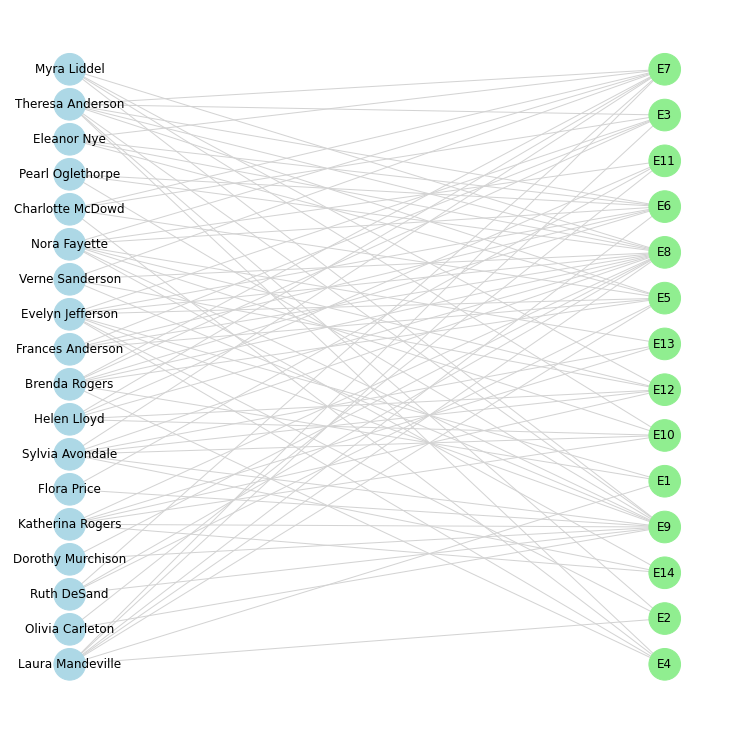

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)


G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

# Take a quick look at nodes and edges
G.nodes()
G.edges()
women
clubs

pos = nx.bipartite_layout(G, women)
node_color = ["lightblue" if node in women else "lightgreen" for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color="lightgrey", node_size=1000)

The below biadjacency matrix shows the connections between women and clubs in the bipartite graph. i.e. in the example output below, (0, 0) 1 indicates that there is an edge between the first woman (index 0) and the first club (index 0). Whereas (0, 5) 1 indicates an edge between the first woman and the sixth club.

In [2]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Projected degrees, no weights

We can count the number of degrees - here defined as friends - per woman. Additionally, we can visualize it.

<b>Note</b> that this is based solely on the number of women each is connected to based on shared club nodes. So in the example below, Flora Price is connected to 12 women based on being a part of 2 clubs, yet Charlotte McDowd is connected to only 11 women despite being a part of 4 clubs (confirmed by checking the subgraphs associated with these women).

# of friends, Member
17: Evelyn Jefferson
15: Laura Mandeville
17: Theresa Anderson
15: Brenda Rogers
11: Charlotte McDowd
15: Frances Anderson
15: Eleanor Nye
16: Pearl Oglethorpe
17: Ruth DeSand
17: Verne Sanderson
16: Myra Liddel
16: Katherina Rogers
17: Sylvia Avondale
17: Nora Fayette
17: Helen Lloyd
16: Dorothy Murchison
12: Olivia Carleton
12: Flora Price


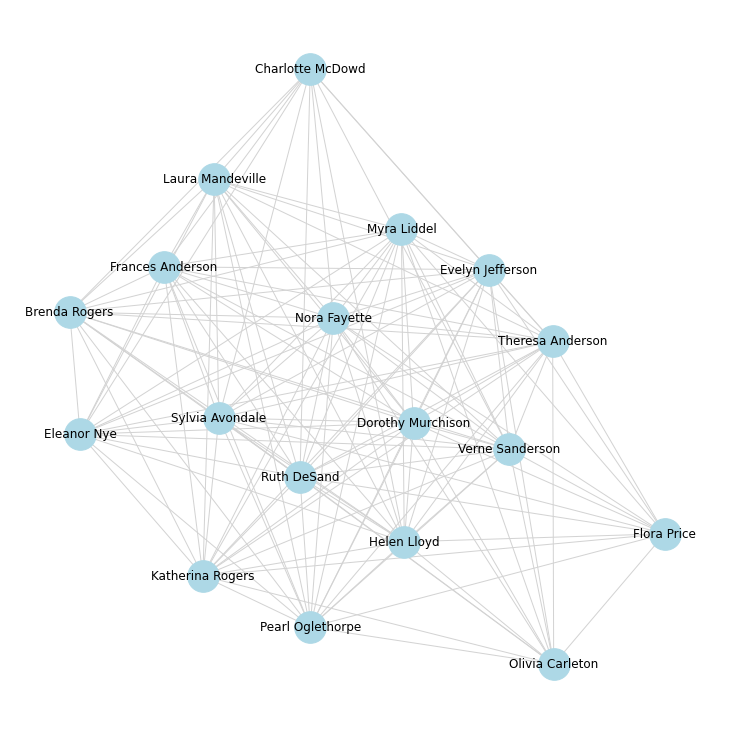

In [3]:
# Project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print("# of friends, Member")

# Iterating over the women nodes, calculating degree.
for w in women:
    print(f"{W.degree(w)}: {w}")


nx.draw(W, with_labels=True, node_color='lightblue', edge_color='lightgrey', node_size=1000)

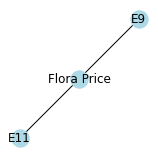

In [4]:
plt.rcParams["figure.figsize"] = (2, 2)
subgraph = G.subgraph(['Flora Price'] + list(G.neighbors('Flora Price')))
nx.draw(subgraph, with_labels=True, node_color='lightblue')

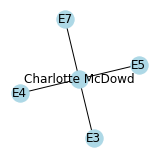

In [5]:
#subgraph = G.subgraph(['E3', 'E7', 'E5', 'E4'] + list(G.neighbors('E3')))
subgraph = G.subgraph(['Charlotte McDowd'] + list(G.neighbors('Charlotte McDowd')))
nx.draw(subgraph, with_labels=True, node_color='lightblue')

### Weighted chart
Next, we can calculate the weights given to each woman (labeled as "friend meetings"), and graph the edges as weights in a new visual.

We can see that overall, most of the women have similar projected connections through shared clubs, but some have much higher weights (i.e. Evelyn Jefferson, who has 17 connections but a weight of 50).

The visual shows these women with their higher weights toward the center, with thicker edge lines: Evelyn Jefferson as mentioned, but also Nora Fayette, Theresa Anderson, and Laura Mandeville.

# of friend meetings, Member, # of friends
50 Evelyn Jefferson - 17
45 Laura Mandeville - 15
57 Theresa Anderson - 17
46 Brenda Rogers - 15
24 Charlotte McDowd - 11
32 Frances Anderson - 15
36 Eleanor Nye - 15
31 Pearl Oglethorpe - 16
40 Ruth DeSand - 17
38 Verne Sanderson - 17
33 Myra Liddel - 16
37 Katherina Rogers - 16
46 Sylvia Avondale - 17
43 Nora Fayette - 17
34 Helen Lloyd - 17
24 Dorothy Murchison - 16
14 Olivia Carleton - 12
14 Flora Price - 12


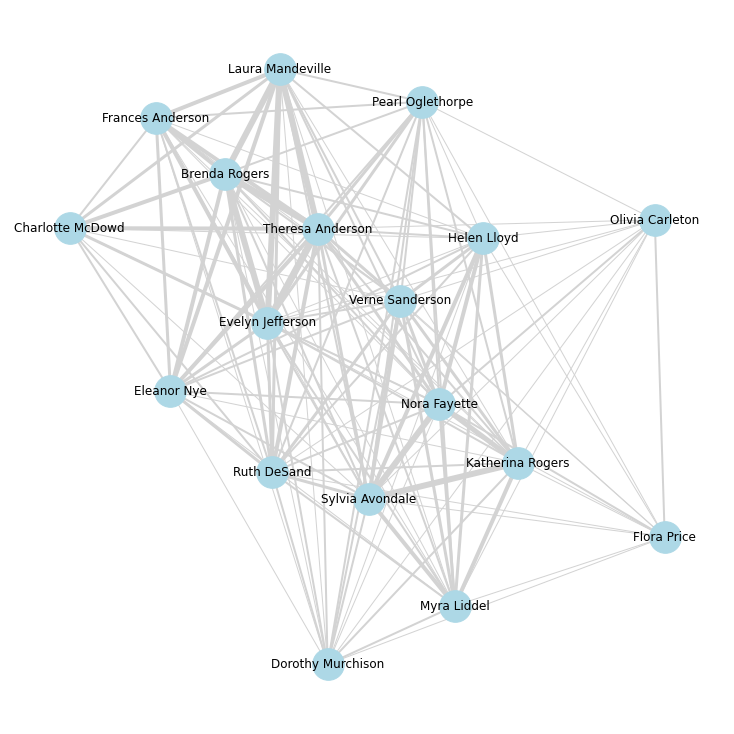

In [6]:
# Project bipartite graph onto women nodes keeping number of co-occurrence
# The degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print("# of friend meetings, Member, # of friends")
for w in women:
    weighted_degree = W.degree(w, weight='weight')
    degree = W.degree(w)
    print(f"{weighted_degree} {w} - {degree}")



plt.rcParams["figure.figsize"] = (10, 10)
weights = [edata['weight'] for f, t, edata in W.edges(data=True)]
nx.draw(W, with_labels=True, node_color='lightblue', edge_color='lightgrey', width=weights, node_size=1000)

### Clubs - quick look

We can take a similar look at the clubs to see which clubs are the most influential. Like the women and their friends, most clubs have similar number of members, but some have much more influence than others, reflected by the weightings as well as the visual below.

Clubs E5, E7, E8, and E9 appear to be the most influential.

Club influence, club name, # of club members
19 E1 - 8
20 E2 - 8
32 E3 - 8
23 E4 - 8
38 E5 - 8
41 E6 - 13
48 E7 - 13
59 E8 - 13
46 E9 - 13
25 E10 - 8
13 E11 - 8
28 E12 - 8
18 E13 - 8
18 E14 - 8


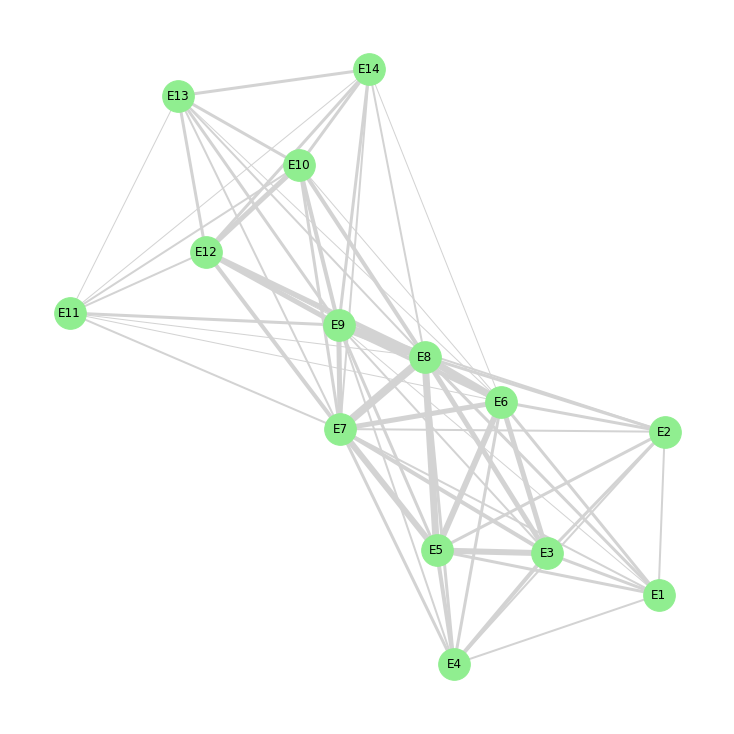

In [21]:
C = bipartite.weighted_projected_graph(G, clubs)
print("Club influence, club name, # of club members")
for c in clubs:
    weighted_degree = C.degree(c, weight='weight')
    degree = C.degree(c)
    print(f"{weighted_degree} {c} - {degree}")

    
plt.rcParams["figure.figsize"] = (10, 10)
weights = [edata['weight'] for f, t, edata in C.edges(data=True)]
nx.draw(C, with_labels=True, node_color='lightgreen', edge_color='lightgrey', width=weights, node_size=1000)

As expected, the 3 women with highest influence/weight, appear to be connected to almost every club, including the highly weighted clubs.

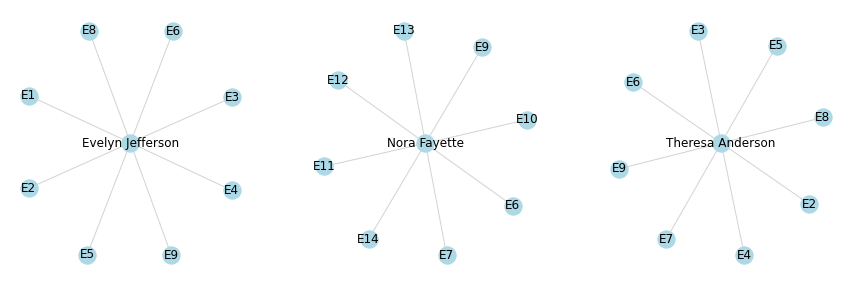

In [20]:
subgraph1 = G.subgraph(['Evelyn Jefferson'] + list(G.neighbors('Evelyn Jefferson')))
subgraph2 = G.subgraph(['Nora Fayette'] + list(G.neighbors('Nora Fayette')))
subgraph3 = G.subgraph(['Theresa Anderson'] + list(G.neighbors('Theresa Anderson')))

# Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Draw the first subgraph
nx.draw(subgraph1, with_labels=True, node_color='lightblue', edge_color='lightgrey', ax=ax1)

# Draw the second subgraph
nx.draw(subgraph2, with_labels=True, node_color='lightblue', edge_color='lightgrey', ax=ax2)

# Draw the third subgraph
nx.draw(subgraph3, with_labels=True, node_color='lightblue', edge_color='lightgrey', ax=ax3)

# Display the plot
plt.show()